# **Python for finance (Python Fundamentals)**

In [1]:
# Instalar librería de Yahoo Finance
!pip install yfinance > /dev/null
!pip install pandas > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

Antes que nada es necesario realiar un análisis exploratorio de los datos. El primer paso es importar el archivo csv con los datos y convertirlo a un pandas dataframe.

[Más información de los datos](https://finance.yahoo.com/quote/%5EGSPC/)

In [3]:
# Verificar si el archivo CSV ya existe para evitar descarga innecesaria
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    # Descargar datos del índice S&P 500 utilizando yfinance
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [4]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [5]:
# Convertimos el indice "Date" a formato fecha usando pandas
print(sp500.index)
sp500.index = pd.to_datetime(sp500.index)

Index(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
       '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
       '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
       '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
       '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
       ...
       '2023-07-24 00:00:00-04:00', '2023-07-25 00:00:00-04:00',
       '2023-07-26 00:00:00-04:00', '2023-07-27 00:00:00-04:00',
       '2023-07-28 00:00:00-04:00', '2023-07-31 00:00:00-04:00',
       '2023-08-01 00:00:00-04:00', '2023-08-02 00:00:00-04:00',
       '2023-08-03 00:00:00-04:00', '2023-08-04 00:00:00-04:00'],
      dtype='object', name='Date', length=24013)


Text(0.5, 1.0, 'Precio de Cierre del Índice S&P 500')

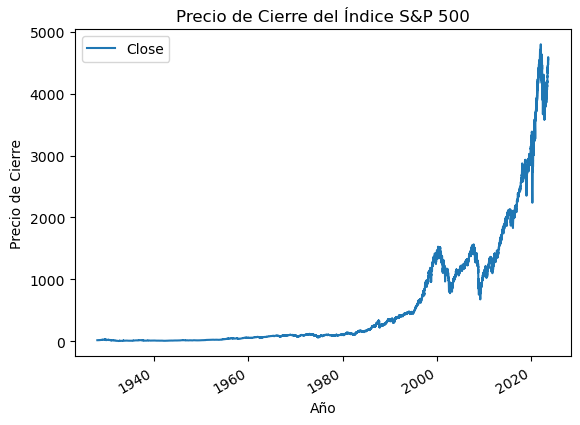

In [6]:
# Graficar la línea del cierre del índice S&P 500
sp500.plot.line(y="Close", use_index=True)
plt.xlabel("Año")
plt.ylabel("Precio de Cierre")
plt.title("Precio de Cierre del Índice S&P 500")

Ahora es necesario establecer exactamente qué es lo que se va a predecir. Para tener una noción sobre si el precio de una acción tiende a subir o bajar podemos comparar su precio de cierre en cierto momento histórico respecto a su precio futuro. Para ello crearemos una columna de precio futuro que contenga el precio de cierre de la acción al día siguiente. Así podremos ver si sube o baja.

In [7]:
# Eliminar columnas innecesarias
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
# Crear una columna "Tomorrow" con los valores desplazados del cierre del día siguiente
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
# Crear una columna "Target" que indica si el valor de "Tomorrow" es mayor que "Close"
# (es decir, si el precio sube)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
# Definir una fecha mínima para filtrar los datos
min_date = datetime(year=1990, month=1, day=1)
min_date = pytz.utc.localize(min_date)

# Filtrar el DataFrame para incluir solo datos posteriores a la fecha mínima
sp500 = sp500[sp500.index > min_date]

# Predicción con random forest

- n_estimators: El número de árboles en el bosque.

- min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno.

- random_state: Semilla aleatoria para la generación de números pseudoaleatorios.

In [11]:
'''from sklearn.model_selection import GridSearchCV

# Definir los valores que deseas probar para cada hiperparámetro
param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 10],
    'random_state': [1, 42, 123]
}

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(train[predictors], train["Target"])

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
'''

'from sklearn.model_selection import GridSearchCV\n\n# Definir los valores que deseas probar para cada hiperparámetro\nparam_grid = {\n    \'n_estimators\': [50, 100, 150],\n    \'min_samples_split\': [2, 5, 10],\n    \'random_state\': [1, 42, 123]\n}\n\n# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)\ngrid_search.fit(train[predictors], train["Target"])\n\n# Imprimir los mejores hiperparámetros encontrados\nprint("Mejores hiperparámetros:", grid_search.best_params_)\n'

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo de clasificación RandomForest con parámetros específicos
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = sp500.iloc[:-100]  # Utilizar todos los datos excepto los últimos 100 como conjunto de entrenamiento
test = sp500.iloc[-100:]   # Utilizar los últimos 100 datos como conjunto de prueba

# Definir las variables predictoras que vamos a usar para predecir
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Entrenar el modelo utilizando las variables predictoras y el objetivo
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
from sklearn.metrics import precision_score

# Realizar predicciones utilizando el modelo en el conjunto de prueba
preds = model.predict(test[predictors])

# Crear una Serie de pandas con las predicciones y usar los índices del conjunto de prueba
preds = pd.Series(preds, index=test.index)

# Calcular la precisión del modelo comparando las predicciones con los valores reales del objetivo
precision = precision_score(test["Target"], preds)

# Imprimir el valor de la precisión
print(f"Precisión del modelo: {precision:.2f}")

Precisión del modelo: 0.54


In [14]:


def predict(train, test, predictors, model):
    # Entrenar el modelo utilizando el conjunto de entrenamiento
    model.fit(train[predictors], train["Target"])

    # Realizar predicciones en el conjunto de prueba
    preds = model.predict(test[predictors])

    # Crear una Serie de pandas con las predicciones y usar los índices del conjunto de prueba
    preds = pd.Series(preds, index=test.index, name="Predictions")

    # Combinar los valores reales del objetivo y las predicciones en un DataFrame
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined


In [15]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    # Iterar a través de ventanas de tiempo desplazadas
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()        # Conjunto de entrenamiento
        test = data.iloc[i:(i+step)].copy()  # Conjunto de prueba
        predictions = predict(train, test, predictors, model)  # Realizar predicciones
        all_predictions.append(predictions)

    # Combinar todos los resultados de predicción en un solo DataFrame
    return pd.concat(all_predictions)

In [16]:
predictions = backtest(sp500, model, predictors)

In [17]:
# Calcular el recuento de valores únicos en la columna "Predictions" del DataFrame predictions
# Esto nos dará una idea de cómo se distribuyen las predicciones realizadas por el modelo

# Calcular el recuento de valores únicos en la columna "Predictions"
prediction_counts = predictions["Predictions"].value_counts()

# Imprimir el recuento de valores únicos en la columna "Predictions"
print(prediction_counts)


0    3427
1    2536
Name: Predictions, dtype: int64


In [18]:
# Calcular la precisión del modelo comparando las predicciones con los valores reales del objetivo en el DataFrame predictions
precision = precision_score(predictions["Target"], predictions["Predictions"])

# Imprimir la precisión del modelo en el backtest con un formato de dos decimales
print(f"Precisión del modelo en el backtest: {precision:.2f}")

Precisión del modelo en el backtest: 0.53


In [19]:
# Calcular la proporción de valores únicos en la columna "Target" del DataFrame predictions
# Esto nos dará una idea de cómo se distribuyen las clases reales en los datos de prueba durante el backtest

# Calcular el conteo de valores únicos en la columna "Target" y dividirlo entre el número total de filas en el DataFrame predictions
target_distribution = predictions["Target"].value_counts() / predictions.shape[0]

# Imprimir la distribución de las clases reales en el backtest
print(target_distribution)

# La proporción te ayudará a comprender cómo se distribuyen las clases y puede ser útil para evaluar la calidad de las predicciones en
# relación con esta distribución.


1    0.533959
0    0.466041
Name: Target, dtype: float64


## Modelo 2 - Cambiar parametros

In [20]:
# Definir una lista de horizontes de tiempo para calcular los promedios móviles y tendencias
horizons = [2, 4, 8, 16, 32, 64, 128]

# Crear una lista para almacenar los nuevos predictores generados
new_predictors = []

# Iterar a través de los horizontes de tiempo
for horizon in horizons:
    # Calcular promedios móviles con la ventana del horizonte actual
    rolling_averages = sp500.rolling(horizon).mean()

    # Crear una nueva columna para la relación de cierre con el promedio móvil
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    # Crear una nueva columna para la tendencia utilizando sumas acumuladas de Target desplazados
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    # Agregar las nuevas columnas a la lista de predictores
    new_predictors += [ratio_column, trend_column]


In [21]:
# Eliminar filas con valores faltantes en las columnas que no sean "Tomorrow"
# Esto se hace para asegurarse de que los datos sean consistentes y completos para el análisis
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])


In [22]:
# Crear un nuevo modelo de clasificación RandomForest con los parámetros especificados
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [23]:
def predict(train, test, predictors, model):
    # Entrenar el modelo utilizando el conjunto de entrenamiento
    model.fit(train[predictors], train["Target"])

    # Realizar predicciones de probabilidades en el conjunto de prueba
    preds = model.predict_proba(test[predictors])[:, 1]  # Tomar la probabilidad de la clase positiva

    # Aplicar un umbral para las predicciones (por ejemplo, 0.6)
    # Aplica un umbral (en este caso, 0.6) para convertir las probabilidades en predicciones binarias.
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0

    # Crear una Serie de pandas con las predicciones y usar los índices del conjunto de prueba
    preds = pd.Series(preds, index=test.index, name="Predictions")

    # Combinar los valores reales del objetivo y las predicciones en un DataFrame
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined



In [24]:
# Definir la función de análisis de retroceso
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [25]:
predictions = backtest(sp500, model, new_predictors)

In [26]:
# Calcular el recuento de valores únicos en la columna "Predictions" del DataFrame predictions
# Esto nos dará una idea de cómo se distribuyen las predicciones realizadas por el modelo

# Calcular el recuento de valores únicos en la columna "Predictions"
prediction_counts = predictions["Predictions"].value_counts()

# Imprimir el recuento de valores únicos en la columna "Predictions"
print(prediction_counts)


0.0    5080
1.0     755
Name: Predictions, dtype: int64


In [27]:
# Calcular la precisión del modelo comparando las predicciones con los valores reales del objetivo en el DataFrame predictions
precision = precision_score(predictions["Target"], predictions["Predictions"])

# Imprimir la precisión del modelo en el backtest con un formato de dos decimales
print(f"Precisión del modelo en el backtest: {precision:.2f}")

Precisión del modelo en el backtest: 0.54


# Ensamble de modelos
- 2 Random forest
- 1 Logistic Regression

In [28]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# Descargar los datos del índice S&P 500
sp500 = yf.download("^GSPC", start="2000-01-01", end="2023-01-01")

# Crear una columna "Target" que indica si el precio subirá al día siguiente
sp500["Target"] = (sp500["Close"].shift(-1) > sp500["Close"]).astype(int)

# Definir los predictores
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Dividir los datos en conjuntos de entrenamiento y prueba
train, test = train_test_split(sp500, test_size=0.2, shuffle=False)

# Crear los modelos individuales
model_rf1 = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
model_rf2 = RandomForestClassifier(n_estimators=200, min_samples_split=10, random_state=1)
model_logreg = LogisticRegression()

# Crear el ensamblaje de modelos utilizando votación mayoritaria
ensemble_model = VotingClassifier(estimators=[
    ('rf1', model_rf1),
    ('rf2', model_rf2),
    ('logreg', model_logreg)
], voting='soft')

# Realizar validación cruzada en el ensamblaje de modelos
cv_scores = cross_val_score(ensemble_model, train[predictors], train["Target"], cv=5, scoring='precision')

# Imprimir los resultados de la validación cruzada
print("Resultados de la Validación Cruzada:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: Precisión = {score:.2f}")

# Entrenar el ensamblaje de modelos con todos los datos de entrenamiento
ensemble_model.fit(train[predictors], train["Target"])

# Realizar predicciones en el conjunto de prueba
preds = ensemble_model.predict(test[predictors])

# Calcular la precisión final del modelo ensamblado
final_precision = precision_score(test["Target"], preds)
print(f"Precisión final del modelo ensamblado: {final_precision:.2f}")


[*********************100%%**********************]  1 of 1 completed
Resultados de la Validación Cruzada:
Fold 1: Precisión = 0.48
Fold 2: Precisión = 0.49
Fold 3: Precisión = 0.53
Fold 4: Precisión = 0.52
Fold 5: Precisión = 0.61
Precisión final del modelo ensamblado: 0.63


# Backtesting

In [29]:
!pip install fastquant > /dev/null

In [31]:
from fastquant import backtest, get_stock_data
jfc = get_stock_data("^GSPC", "2018-01-01", "2019-01-01")
backtest('smac', jfc, fast_period=15, slow_period=40)

[*********************100%%**********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
2018-12-31T00:00:00, ===Global level arguments===
2018-12-31T00:00:00, init_cash : 100000
2018-12-31T00:00:00, buy_prop : 1
2018-12-31T00:00:00, sell_prop : 1
2018-12-31T00:00:00, commission : 0
2018-12-31T00:00:00, stop_loss : 0
2018-12-31T00:00:00, stop_trail : 0
2018-12-31T00:00:00, take_profit : 0
2018-12-31T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 15
slow_period : 40
2018-12-31T00:00:00, Final Portfolio Value: 97338.60815429688
2018-12-31T00:00:00, Final PnL: -2661.39
Time used (seconds): 0.04638385772705078
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	e

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,...,1,3,2138.494873,2.138495,-1599.96224,-1.599962,2138.494873,2.138495,-2050.907471,-2.050907
